In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [152]:
class deEmphasis:
    def __init__(self, coef=0.95):
        self.coef = coef
        self.prev = np.zeros(3)

    def smoothPos(self, pos):
        out = (pos + self.prev*(self.coef))/(1+self.coef)
        self.prev = out
        return out

0.07498860728925559 0.010941485480612839


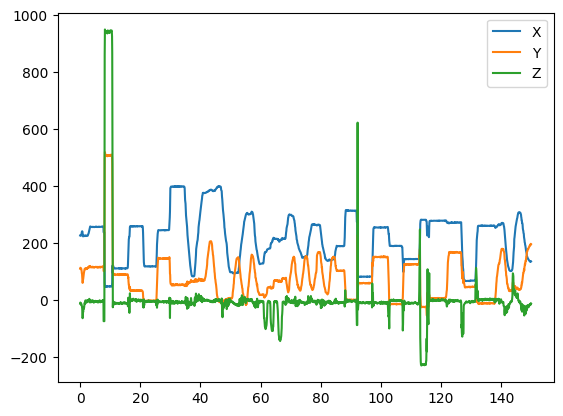

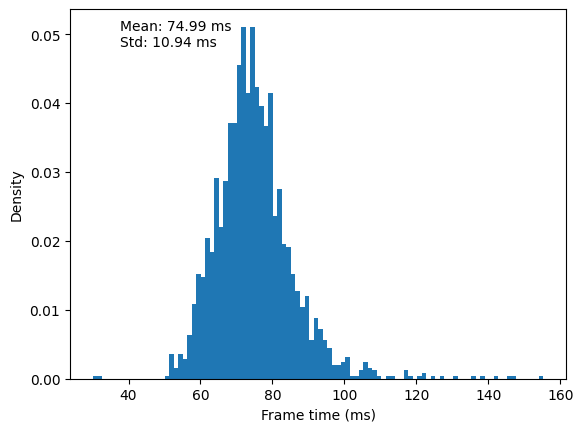

In [153]:
df = pd.read_csv('dataCapture.csv')
xs = df['X'].to_numpy()*1000
ys = df['Y'].to_numpy()*1000
zs = df['Z'].to_numpy()*1000
deemph = deEmphasis()
# for i in range(len(xs)):
#     xs[i], ys[i], zs[i] = deemph.smoothPos(np.array([xs[i], ys[i], zs[i]]))
times = df['Time'] - df['Time'][0]
dts = np.diff(times)
print(np.mean(dts), np.std(dts))
plt.plot(times, xs, label='X')
plt.plot(times, ys, label='Y')
plt.plot(times, zs, label='Z')
plt.legend()
plt.show()

plt.hist(dts*1000, bins=100, density=True)
mean = np.mean(dts)*1000
std = np.std(dts)*1000
plt.text(0.1, 0.9, f"Mean: {mean:.2f} ms\nStd: {std:.2f} ms", transform=plt.gca().transAxes)
plt.xlabel("Frame time (ms)")
plt.ylabel("Density")
plt.show()





In [154]:
# windows = [50,118,171,242,257,319,329,383,396,448,475,517,1209,1252,1265,1318,1330,1388,1405,1445,1460,1515,1561,1627,1643,1695,1715,1752,1770,1842]
windows = [50,118,171,242,257,319,329,383,399,448,475,517,1213,1252,1265,1318,1330,1388,1405,1445,1460,1515,1561,1627,1643,1695,1715,1752,1772,1842]
xErrs = np.zeros(len(windows)//2)
yErrs = np.zeros(len(windows)//2)
zErrs = np.zeros(len(windows)//2)
points = np.zeros((len(windows)//2, 3))
totalPoints = 0
for i in range(len(windows)//2):
    totalPoints += windows[2*i+1] - windows[2*i]
scatterPoints = np.zeros((totalPoints, 3))
scatterIndex = 0
for i in range(len(windows)//2):
    x = xs[windows[2*i]:windows[2*i+1]]
    y = ys[windows[2*i]:windows[2*i+1]]
    z = zs[windows[2*i]:windows[2*i+1]]
    scatterPoints[scatterIndex:scatterIndex+len(x),0] = x
    scatterPoints[scatterIndex:scatterIndex+len(x),1] = y
    scatterPoints[scatterIndex:scatterIndex+len(x),2] = z
    scatterIndex += len(x)
    xErrs[i] = np.std(x)
    yErrs[i] = np.std(y)
    zErrs[i] = np.std(z)
    points[i] = [np.mean(x), np.mean(y), np.mean(z)]
    print("Point ", points[i])
    print("StdDev: x,y,z ",xErrs[i], yErrs[i], zErrs[i])
print("Stationary positional errors")
print("Mean StdDev: x,y,z ",np.mean(xErrs), np.mean(yErrs), np.mean(zErrs))
print("Max StdDev: x,y,z ",np.max(xErrs), np.max(yErrs), np.max(zErrs))



Point  [256.16256218 115.04968983  -5.7063362 ]
StdDev: x,y,z  0.45799324231845645 0.7853178089075787 1.9081051730267242
Point  [110.33124529  88.74965828 -11.65728441]
StdDev: x,y,z  0.30454956926775567 0.7508452090903937 1.3711543113164648
Point  [258.28288295  32.07362073  -1.22321472]
StdDev: x,y,z  0.3295166074777668 0.6693145043791314 1.934783254544378
Point  [117.42360059  -3.50931485  -5.18230162]
StdDev: x,y,z  0.28448507506804893 0.4942200117208702 1.249588230247756
Point  [244.61927132 145.00743754  -7.01219453]
StdDev: x,y,z  0.30957959115291184 0.572909053142242 1.3542896954518702
Point  [397.74921074  52.66382574  -8.69507079]
StdDev: x,y,z  0.5496338151523757 0.9282504832474358 2.2280858116640263
Point  [ 3.13074412e+02 -7.08364305e-02 -4.00177244e+00]
StdDev: x,y,z  0.4811424017102825 0.5035255115576152 1.8641318742228643
Point  [81.23514189 58.55557222 -9.79552139]
StdDev: x,y,z  0.33504125518230754 0.5983390435024752 1.5490927057170913
Point  [254.15548738 150.4859353

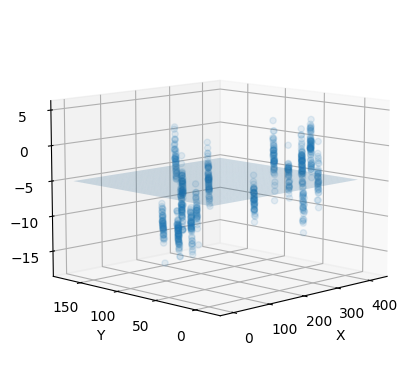

In [155]:
#make a 3d plot of the points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scatterPoints[:,0], scatterPoints[:,1], scatterPoints[:,2], alpha=0.1)
#draw the z = 0 plane
xx, yy = np.meshgrid(range(-5,425), range(-5,175))
zz = np.zeros(xx.shape)-5
ax.plot_surface(xx, yy, zz, alpha=0.2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10, 225)
plt.show()

In [156]:
#z uncertainty when x and why change
zErr = np.std(zs[950:1200])
print("Z uncertainty when x and y change: ", zErr)
#x uncertainty when y changed
xErr = np.std(xs[1134:1160])
print("X uncertainty when y changed: ", xErr)
xErr = np.std(xs[1072:1100])
print("X uncertainty when y changed: ", xErr)
yErr = np.std(ys[548:606])
print("Y uncertainty when x changed: ", yErr)


Z uncertainty when x and y change:  6.332214917396133
X uncertainty when y changed:  1.873792649229575
X uncertainty when y changed:  0.9698373403156031
Y uncertainty when x changed:  3.0558785051538186


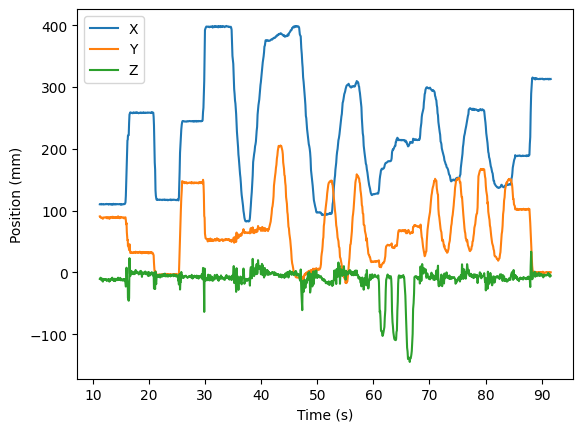

In [157]:
xFull = xs[171:1251]
yFull = ys[171:1251]
zFull = zs[171:1251]
timesFull = times[171:1251]
plt.plot(timesFull, xFull, label='X')
plt.plot(timesFull, yFull, label='Y')
plt.plot(timesFull, zFull, label='Z')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (mm)')
plt.show()